### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#Ans:1 Import all necessary Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Ans 2.1: Read all three datasets into dataframes
usersdf = pd.read_csv('95_user.csv')
usersdf.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Ans 2.2: Read all three datasets into dataframes
moviesdf = pd.read_csv('94_item.csv')
moviesdf.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Ans 2.3: Read all three datasets into dataframes
ratingsdf = pd.read_csv('93_Data.csv')
ratingsdf.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
# Ans 3.1: Info in Dataset Users
usersdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [6]:
# Ans 3.1: Shape in Dataset Users
usersdf.shape

(943, 5)

In [7]:
# Ans 3.1: describe in Dataset Users
usersdf.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [8]:
# Ans 3.1: Find number of missing values in Dataset Users
usersdf.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [9]:
# Ans 3.2: Info in Dataset Movies
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
# Ans 3.2: Shape in Dataset Movies
moviesdf.shape

(1681, 22)

In [11]:
# Ans 3.2: describe in Dataset Movies
moviesdf.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Ans 3.2: Find number of missing values in Dataset Movies
moviesdf.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [13]:
# Ans 3.3: Info in Dataset Ratings
ratingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [14]:
# Ans 3.3: Shape in Dataset Ratings
ratingsdf.shape

(100000, 4)

In [15]:
# Ans 3.3: describe in Dataset Ratings
ratingsdf.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [16]:
# Ans 3.3: Find number of missing values in Dataset Ratings
ratingsdf.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [17]:
#Ans 4: Find the number of movies per genre using the item data
for i in moviesdf.columns:
     if moviesdf.columns.get_loc(i) >= 3: #Skipping columns movie id, movie title, release date
            print(i,":",moviesdf[i].sum())

unknown : 1
Action : 251
Adventure : 135
Animation : 42
Childrens : 122
Comedy : 505
Crime : 109
Documentary : 50
Drama : 725
Fantasy : 22
Film-Noir : 24
Horror : 92
Musical : 56
Mystery : 61
Romance : 247
Sci-Fi : 101
Thriller : 251
War : 71
Western : 27


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
moviesdf.loc[moviesdf[moviesdf['unknown'] > 0].index]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Ans 5 Drop the movie where the genre is unknown
moviesdf.drop(moviesdf[moviesdf['unknown'] > 0].index, inplace = True)
moviesdf.loc[moviesdf[moviesdf['unknown'] > 0].index]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [20]:
#Ans 6: 

# Creating a new Datafram and chekcing the duplicates
moviesdf1 = moviesdf.copy()
print(moviesdf1.duplicated().sum())
#moviesdf1.drop('movie id', axis=1, inplace=True)
#moviesdf1=moviesdf1.drop_duplicates()
print(moviesdf1.duplicated().sum())

0
0


In [21]:
#Ans 6.1: Display movie name, number of genres for the movie in dataframe


# Dripping the un necessary columns and getting counts of the ratings
#Creating a new Dataframe with sum values and movie title name
moviesdf1.drop('movie id',axis=1, inplace = True)
sumvalue=moviesdf1.sum(axis=1)
#sumvalue.rename_axis("number of genere")
#my_columns = ["number of genere"]
#sumdf=pd.DataFrame(sumvalue)
MovieName=moviesdf1['movie title']
moviesdf2 = pd.concat([sumvalue,MovieName],axis=1,sort=False) 
moviesdf2
#moviesdf2.rename(columns={'0':'number of genere','movie title':'movie title'},inplace = True)


,0,movie title
0,3,Toy Story
1,3,GoldenEye
2,1,Four Rooms
3,3,Get Shorty
4,3,Copycat
...,...,...
1676,1,Mat' i syn
1677,2,B. Monkey
1678,2,Sliding Doors
1679,1,You So Crazy


In [22]:
#Ans 6.2: Find the movies that have more than one genre
moviesdf2[moviesdf2[0]>1]

,0,movie title
0,3,Toy Story
1,3,GoldenEye
3,3,Get Shorty
4,3,Copycat
6,2,Twelve Monkeys
...,...,...
1667,3,MURDER and murder
1668,2,Tainted
1671,2,Mirage
1677,2,B. Monkey


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [23]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


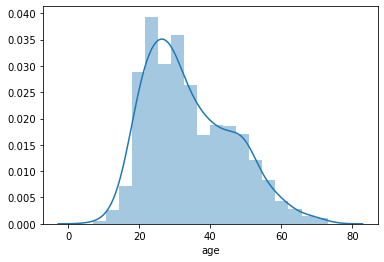

In [24]:
#Ans: 7.1 Distplot for Age
sns.distplot(usersdf['age'])

In [25]:
#Ans 7.2 Fetch Release Year from Release date
moviesdf['Release_dt'] = moviesdf['release date'].apply(lambda x : datetime.strptime(x, '%d-%b-%Y'))
moviesdf['Release_Year'] = moviesdf['Release_dt'].dt.year
moviesdf.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Release_dt,Release_Year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1995-01-01,1995


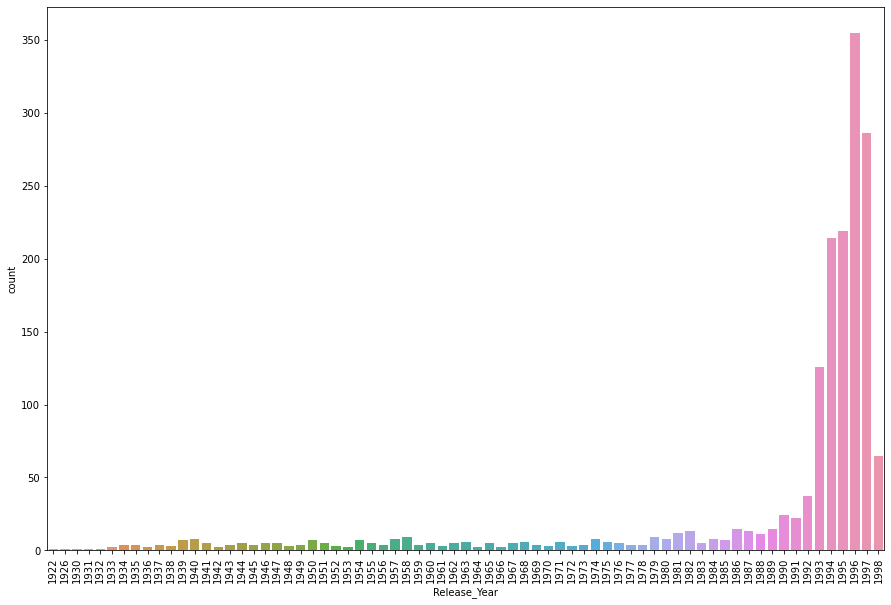

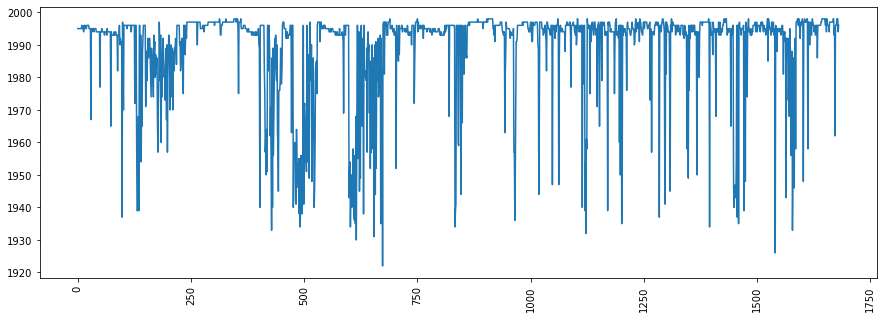

In [26]:
#Ans 7.2 Countplot for Release Year
plt.figure(figsize=(15,10)) 
plt.xticks(rotation=90)
sns.countplot(moviesdf['Release_Year']);
plt.show()
#Ans 7.2 Lineplot for Release Year
fig,ax = plt.subplots(figsize=(15,5)) 
#plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.lineplot(data=moviesdf['Release_Year'])
plt.show()

In [27]:
#Ans 7.2 Distplot and Boxplot for Ratings
#sns.distplot(ratingsdf['rating'])
#plt.show()
#sns.boxplot(ratingsdf['rating'])
#plt.show()

Text(0.5, 1.0, 'Ratings Percentage Graph')

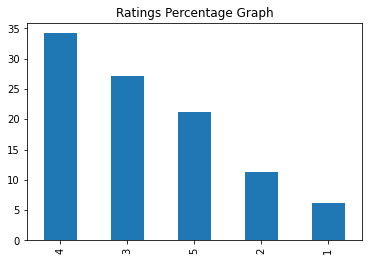

In [28]:
#Ans 7.3 Plot percentages in y-axis and categories in x-axis for ratings
ratings_percent = ratingsdf['rating'].value_counts()
ax=(ratings_percent/ratingsdf.shape[0]*100).plot(kind="bar")
plt.title("Ratings Percentage Graph")

Text(0.5, 1.0, 'Gender Percentage Graph')

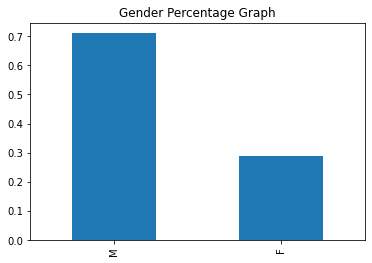

In [29]:
#Ans 7.4 Plot percentages in y-axis and categories in x-axis for Gender
gender_percent = usersdf['gender'].value_counts()
ax=(gender_percent/usersdf.shape[0]).plot(kind="bar")
plt.title("Gender Percentage Graph")

Text(0.5, 1.0, 'Occupation Percentage Graph')

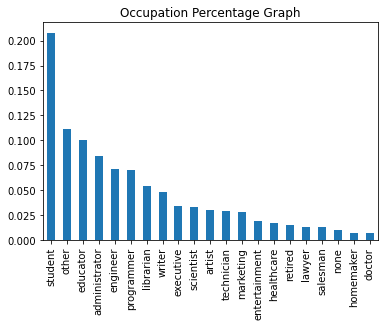

In [30]:
#Ans 7.5 Plot percentages in y-axis and categories in x-axis for Occupation
occupation_percent = usersdf['occupation'].value_counts()
ax=(occupation_percent/usersdf.shape[0]).plot(kind="bar")
plt.title("Occupation Percentage Graph")

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [31]:
popularGenredf = moviesdf.copy()
#popularGenredf.groupby(['Release_Year'])['movie title'].count()
totaldf=pd.DataFrame(popularGenredf.groupby(['Release_Year'])['movie title'].count())
totaldf['total']=totaldf['movie title']
totaldf.drop('movie title', axis=1,inplace=True)
popularGenredf.drop('movie id', axis=1,inplace=True)
popularGenredf.drop('movie title', axis=1,inplace=True)
popularGenredf.drop('release date', axis=1,inplace=True)
popularGenredf.drop('Release_dt', axis=1,inplace=True)
totaldf

popularGenredf = popularGenredf.groupby(['Release_Year'])['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()
popularGenredf=pd.merge(popularGenredf,totaldf,how='outer',on='Release_Year')
#ratingsdf.groupby(['movie id'])['rating'].size()
#popularGenredf
#popularGenredf.to_csv('temp.csv',index=True)

<ipython-input-31-c23d6f783f2e>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  popularGenredf = popularGenredf.groupby(['Release_Year'])['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum()


In [32]:
# Number of Releases in a year/genere and total number of movies released in a year.
popularGenredf

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Release_Year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,214
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,219
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,355


In [33]:
#percentage number of release in a particular year
(popularGenredf.div(popularGenredf['total'], axis= 0) * 100)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
Release_Year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.0
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,14.018692,6.074766,1.869159,7.009346,38.317757,3.738318,4.205607,45.327103,1.401869,0.000000,3.738318,0.934579,0.934579,16.355140,3.271028,11.682243,3.271028,2.803738,100.0
1995,0.0,18.264840,10.045662,2.739726,9.589041,28.767123,5.022831,2.283105,40.639269,1.369863,0.456621,6.392694,1.369863,2.283105,16.894977,6.849315,17.808219,2.283105,0.913242,100.0
1996,0.0,12.394366,6.760563,2.535211,5.915493,30.422535,5.915493,5.070423,47.887324,1.690141,0.281690,3.098592,2.535211,1.690141,10.704225,4.225352,13.239437,2.535211,0.563380,100.0


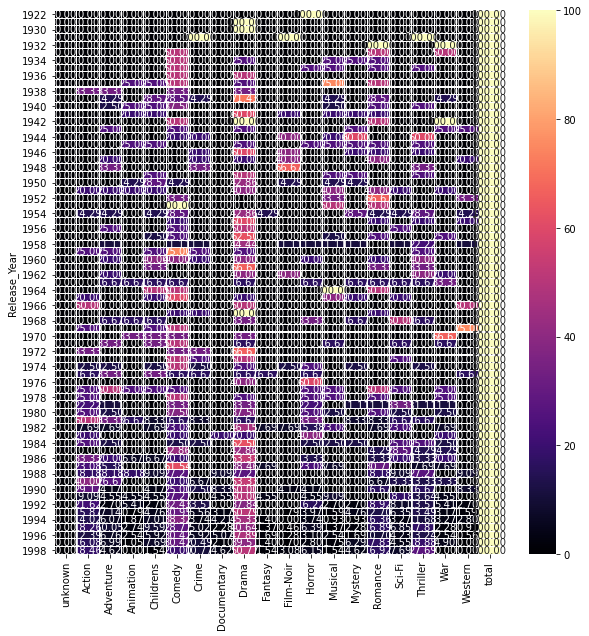

In [34]:
#Heat Plot to view the changes
fig,ax = plt.subplots(figsize=(10, 10))  
#sns.heatmap(popularGenredf, annot=True)
sns.heatmap((popularGenredf.div(popularGenredf['total'], axis= 0) * 100), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [35]:
#Ans 9.1 Find the count of ratings for every moview
#ratingsdf.groupby(['movie id'])['rating'].value_counts()
#ratingsdf.groupby(['movie id']).sum()['rating']
ratingsdf.groupby(['movie id'])['rating'].size()

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64

In [36]:
#Ans 9.1 Find Average ratings for every movie
ratingsdf.groupby(['movie id'])['rating'].mean()

movie id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [37]:
#Ans 9.2 Slice the movies which have ratings more than 100.
ratingsdf.groupby(['movie id'])['rating'].size() > 100

movie id
1        True
2        True
3       False
4        True
5       False
        ...  
1678    False
1679    False
1680    False
1681    False
1682    False
Name: rating, Length: 1682, dtype: bool

In [38]:
#Ans 9.3 Sort values according to average rating such that movie which highest rating is on top
ratingsdf.groupby(['movie id'])['rating'].mean().sort_values(ascending=False).head(10)

movie id
1293    5.0
1467    5.0
1653    5.0
814     5.0
1122    5.0
1599    5.0
1201    5.0
1189    5.0
1500    5.0
1536    5.0
Name: rating, dtype: float64

In [39]:
#Ans 9.4 Select top 25 movies.
pd.merge(ratingsdf,moviesdf,how='left',on='movie id').groupby(['movie title'])['rating'].sum().sort_values(ascending=False).head(25)

movie title
Star Wars                     2541
Fargo                         2111
Return of the Jedi            2032
Contact                       1936
Raiders of the Lost Ark       1786
Godfather, The                1769
English Patient, The          1759
Toy Story                     1753
Silence of the Lambs, The     1673
Scream                        1645
Pulp Fiction                  1600
Air Force One                 1565
Empire Strikes Back, The      1543
Liar Liar                     1531
Twelve Monkeys                1489
Titanic                       1486
Independence Day (ID4)        1475
Chasing Amy                   1455
Jerry Maguire                 1425
Rock, The                     1396
Fugitive, The                 1359
Princess Bride, The           1352
Back to the Future            1342
Star Trek: First Contact      1336
Schindler's List              1331
Name: rating, dtype: int64

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [40]:
CombinedDF = pd.merge(ratingsdf,usersdf,how='outer',on='user id')
CombinedDF = pd.merge(CombinedDF,moviesdf,how='outer',on='movie id')
#CombinedDF.sort_values(by='user id',ascending=True)
#CombinedDF.to_csv('Nirav.csv',index=True)
CombinedDF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user id       100000 non-null  int64         
 1   movie id      100000 non-null  int64         
 2   rating        100000 non-null  int64         
 3   timestamp     100000 non-null  int64         
 4   age           100000 non-null  int64         
 5   gender        100000 non-null  object        
 6   occupation    100000 non-null  object        
 7   zip code      100000 non-null  object        
 8   movie title   99990 non-null   object        
 9   release date  99990 non-null   object        
 10  unknown       99990 non-null   float64       
 11  Action        99990 non-null   float64       
 12  Adventure     99990 non-null   float64       
 13  Animation     99990 non-null   float64       
 14  Childrens     99990 non-null   float64       
 15  Comedy        9999

In [41]:
#CombinedDF.loc['gender' == 'M']['drama'].sum()
totaldramarating = CombinedDF.loc[CombinedDF['Drama'] == 1, 'rating'].sum()
print('Total Drama Ratings:',totaldramarating)
#Print('Male who gave the 'CombinedDF.loc[CombinedDF['gender'] == 'M', 'Drama'].sum())
#Print('Total Ratings for Drama',CombinedDF.loc[CombinedDF['Drama'] == 1, CombinedDF['gender'] == 'F']['rating'].sum())
#CombinedDF.loc[CombinedDF['Drama'] == 1, CombinedDF['gender'] == 'F']['rating'].sum()
femaledramarating=CombinedDF.query("Drama == 1 and gender == 'F'")['rating'].sum()
femaledramaratingPercent=femaledramarating/totaldramarating*100
print('Drama Ratings by Female:',femaledramarating)
print('Drama Ratings by Female%:',femaledramaratingPercent,'%')
maledramarating=CombinedDF.query("Drama == 1 and gender == 'M'")['rating'].sum()
maledramaratingPercent=maledramarating/totaldramarating*100
print('Drama Ratings by Male:',maledramarating)
print('Drama Ratings by Male%:',maledramaratingPercent,'%')
#print('Female'CombinedDF.loc[CombinedDF['gender'] == 'F', 'Drama'].sum()
print('')
print('')

#Ans: 10.1  Men watch more drama than women
if femaledramaratingPercent > maledramaratingPercent:
    print('Men Watch more Drama than Women is False Statement:',femaledramaratingPercent.round(4),'%')
else:
    print('Men Watch more Drama than Women is True Statement:',maledramaratingPercent.round(4),'%')

Total Drama Ratings: 147108
Drama Ratings by Female: 40314
Drama Ratings by Female%: 27.404355983359164 %
Drama Ratings by Male: 106794
Drama Ratings by Male%: 72.59564401664083 %


Men Watch more Drama than Women is True Statement: 72.5956 %


In [42]:
CombinedDF.columns = [i.replace('-','F') for i in CombinedDF.columns]
totalscifirating=CombinedDF.loc[CombinedDF['SciFFi'] == 1, 'rating'].sum()
#CombinedDF.info()
femalescifirating=CombinedDF.query("SciFFi == 1 and gender == 'F'")['rating'].sum()
femalescifiratingPercent=femalescifirating/totalscifirating*100
print('Sci-Fi Ratings by Female:',femalescifirating)
print('Sci-Fi Ratings by Female%:',femalescifiratingPercent,'%')
malescifirating=CombinedDF.query("SciFFi == 1 and gender == 'M'")['rating'].sum()
malescifiratingPercent=malescifirating/totalscifirating*100
print('Sci-Fi Ratings by Male:',malescifirating)
print('Sci-Fi Ratings by Male%:',malescifiratingPercent,'%')
print('')
print('')

#Ans: 10.2  Women watch more Sci-Fi than men
if femalescifiratingPercent > malescifiratingPercent:
    print('Women Watch more Sci-Fi than Men is True Statement:',femalescifiratingPercent.round(4),'%')
else:
    print('Women Watch more Sci-Fi than Men is False Statement:',malescifiratingPercent.round(4),'%')

Sci-Fi Ratings by Female: 9196
Sci-Fi Ratings by Female%: 20.28768090363572 %
Sci-Fi Ratings by Male: 36132
Sci-Fi Ratings by Male%: 79.71231909636428 %


Women Watch more Sci-Fi than Men is False Statement: 79.7123 %


In [43]:
totalromancerating=CombinedDF.loc[CombinedDF['Romance'] == 1, 'rating'].sum()
#CombinedDF.info()
femaleromancerating=CombinedDF.query("Romance == 1 and gender == 'F'")['rating'].sum()
femaleromanceratingPercent=femaleromancerating/totalromancerating*100
print('Romance Ratings by Female:',femaleromancerating)
print('Romance Ratings by Female%:',femaleromanceratingPercent,'%')
maleromancerating=CombinedDF.query("Romance == 1 and gender == 'M'")['rating'].sum()
maleromanceratingPercent=maleromancerating/totalromancerating*100
print('Romance Ratings by Male:',maleromancerating)
print('Romance Ratings by Male%:',maleromanceratingPercent,'%')
print('')
print('')

#Ans: 10.2  Women watch more Sci-Fi than men
if femaleromanceratingPercent > maleromanceratingPercent:
    print('Men watch more Romance than women is False Statement:',femaleromanceratingPercent.round(4),'%')
else:
    print('Men watch more Romance than women is True Statement:',maleromanceratingPercent.round(4),'%')

Romance Ratings by Female: 21415
Romance Ratings by Female%: 30.383644050963365 %
Romance Ratings by Male: 49067
Romance Ratings by Male%: 69.61635594903663 %


Men watch more Romance than women is True Statement: 69.6164 %
